# Re-calculates p-values based on an existing motif.motif file and one or more outputs from analyze_motifs.py (from clip_analysis_legacy)

Edits were called from groups of randomly selected RBFOX2-capture sequence barcodes (n=1..49, 100, 200, 300, 400, 500, 600, 700, 800, 844) and processed as described in Figure 1F-H, resulting in a set of fasta sequences corresponding to each 51nt edit window as well as a corresponding random background. This was repeated 10 times. HOMER was then run on each of the 580 real/random sequences to find enriched de-novo motifs. The most significant motif that most resembled the canonical RBFOX2 motif (TGCATG) was then used as a pivot, and significance was re-calcuated for this motif for each foreground/background group and trial (findMotifs.pl foreground.fa fasta output/ -nofacts -p 4 -rna -S 20 -len 6 -noconvert -nogo -known -fasta background.fa -mknown TGCATG.motif). 

I did this in one batch using a wrapper script, found here: 
```bash
/home/bay001/projects/kris_apobec_20200121/scripts/recalculate_motif.py
```

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict, OrderedDict
from tqdm import tnrange, tqdm_notebook
pd.options.display.max_rows = 999
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
plt.rcParams['figure.constrained_layout.use'] = True

matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

In [2]:
input_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/motifs_deep_recalc'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data2/07_scRNA_groups/outputs'

In [3]:
prefix_to_clean = ['RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.', '.txt.fx.annotated.windows_51.e0.001_conf0.99']

In [4]:
df = pd.read_csv(os.path.join(input_dir, 'p-values.tsv'), sep='\t')
df.head()

,Unnamed: 0,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif,% of Target Sequences with Motif,# of Background Sequences with Motif,% of Background Sequences with Motif
0,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-16,-36.89,0.0,485.0,13.19%,848.5,8.37%
1,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-20,-46.69,0.0,469.0,13.77%,760.5,8.08%
2,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-17,-40.87,0.0,518.0,13.53%,899.7,8.49%
3,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-16,-38.33,0.0,501.0,13.63%,878.4,8.64%
4,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-15,-36.66,0.0,451.0,13.54%,772.1,8.44%


In [5]:
def nlog10p(row, colname='log10p'):
    if row[colname] == 0:
        return 0
    else:
        return -row[colname]
    
df['rand'] = df['Unnamed: 0'].apply(lambda x: int(x.replace('RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.rand','').split('.')[0]))
df['trial'] = df['Unnamed: 0'].apply(lambda x: int(x.replace('RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_possorted_genome_bam_MD-34_barcodes.rand','').split('trial-')[1].replace('.txt.fx.annotated.windows_51.e0.001_conf0.99','')))
df['log10p'] = np.log10(df['P-value'])
df['-log10p'] = df.apply(nlog10p, axis=1)
df['log10log10p'] = np.log10(df['-log10p'])
df.sort_values(by=['rand', 'trial'], ascending=True)

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


,Unnamed: 0,Motif Name,Consensus,P-value,Log P-value,q-value (Benjamini),# of Target Sequences with Motif,% of Target Sequences with Motif,# of Background Sequences with Motif,% of Background Sequences with Motif,rand,trial,log10p,-log10p,log10log10p
110,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-01,-3.3440,0.0353,9.0,18.75%,10.5,7.99%,1,0,-1.0,1.0,0.000000
111,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,0.0000,0.0000,0.0,0%,0.0,0%,1,1,0.0,0.0,-inf
112,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-0.7116,0.4909,2.0,12.50%,4.5,9.63%,1,2,0.0,0.0,-inf
113,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-0.8708,0.4186,2.0,5.41%,3.6,3.69%,1,3,0.0,0.0,-inf
114,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e-01,-3.8260,0.0218,7.0,15.56%,5.4,4.66%,1,4,-1.0,1.0,0.000000
115,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,0.0000,0.0000,0.0,0%,0.0,0%,1,5,0.0,0.0,-inf
116,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-0.7418,0.4762,2.0,25.00%,4.2,17.09%,1,6,0.0,0.0,-inf
117,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-0.7146,0.4894,3.0,12.00%,6.2,9.58%,1,7,0.0,0.0,-inf
118,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-2.0050,0.1347,6.0,19.35%,8.9,10.63%,1,8,0.0,0.0,-inf
119,RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...,"1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...",TGCATG,1.000000e+00,-1.9610,0.1407,3.0,11.11%,2.9,4.27%,1,9,0.0,0.0,-inf


In [6]:
df.sort_values(by='rand', ascending=True).loc[110] # [['Unnamed: 0']].values

Unnamed: 0                              RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...
Motif Name                              1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...
Consensus                                                                          TGCATG
P-value                                                                               0.1
Log P-value                                                                        -3.344
q-value (Benjamini)                                                                0.0353
# of Target Sequences with Motif                                                        9
% of Target Sequences with Motif                                                   18.75%
# of Background Sequences with Motif                                                 10.5
% of Background Sequences with Motif                                                7.99%
rand                                                                                    1
trial     

In [7]:
df.sort_values(by='rand', ascending=True).loc[239]# [['Unnamed: 0']].values

Unnamed: 0                              RBFOX2-TIA1-STAMP_round2E_read1_feature_FB_pos...
Motif Name                              1-TGCATG,BestGuess:hsa-miR-3680* MIMAT0018107 ...
Consensus                                                                          TGCATG
P-value                                                                               0.1
Log P-value                                                                        -2.412
q-value (Benjamini)                                                                0.0896
# of Target Sequences with Motif                                                        4
% of Target Sequences with Motif                                                    8.51%
# of Background Sequences with Motif                                                  3.4
% of Background Sequences with Motif                                                2.71%
rand                                                                                    2
trial     

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


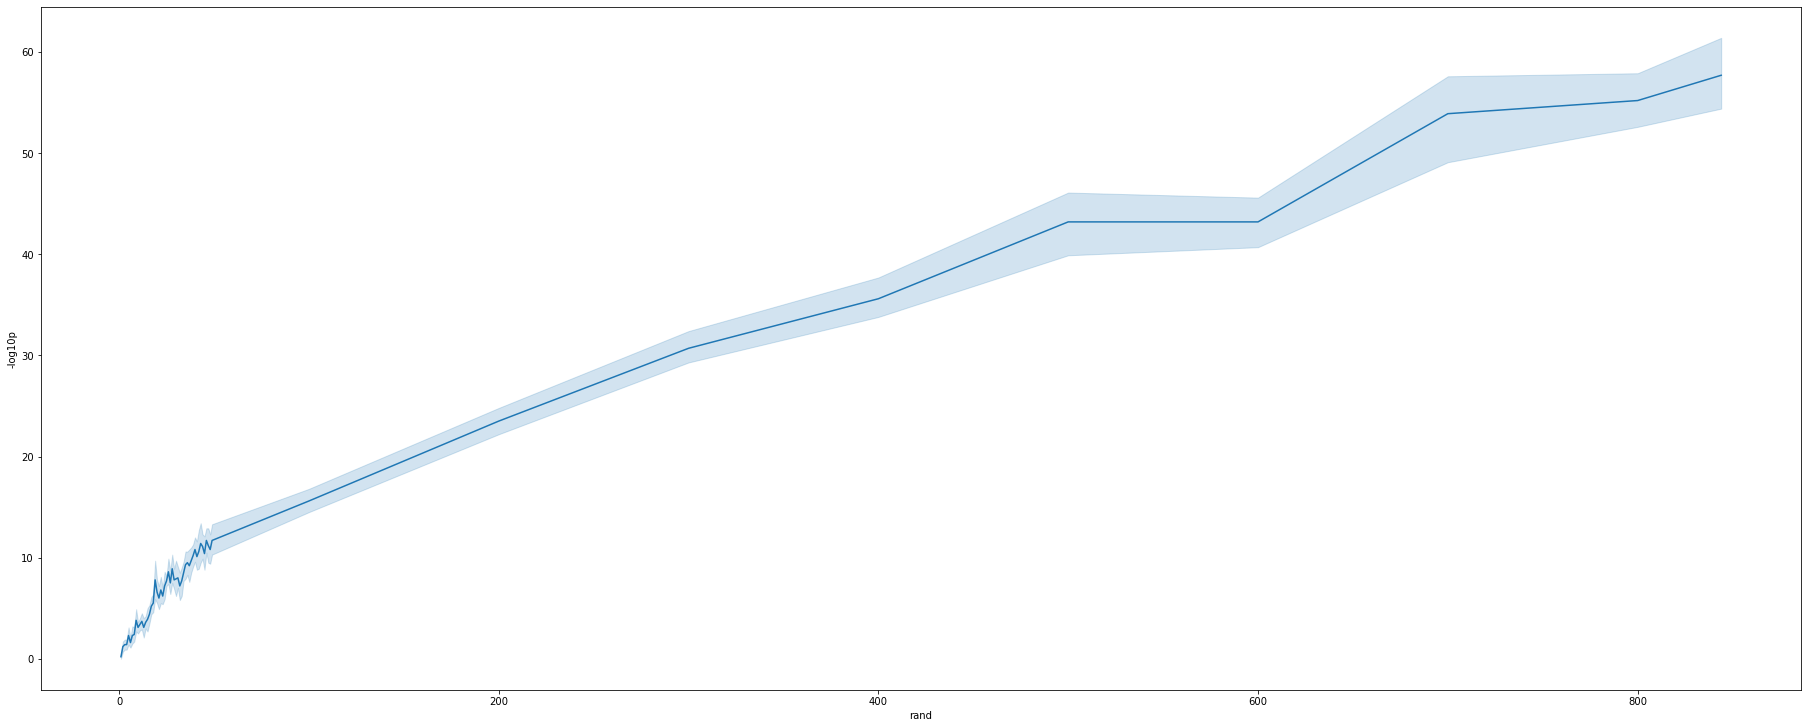

In [8]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.lineplot(x="rand", y="-log10p", data=df, ax=ax)
fig.savefig(os.path.join(output_dir, 'recalculate_motifs_line.basedon-844-1.png'))
fig.savefig(os.path.join(output_dir, 'recalculate_motifs_line.basedon-844-1.svg'))

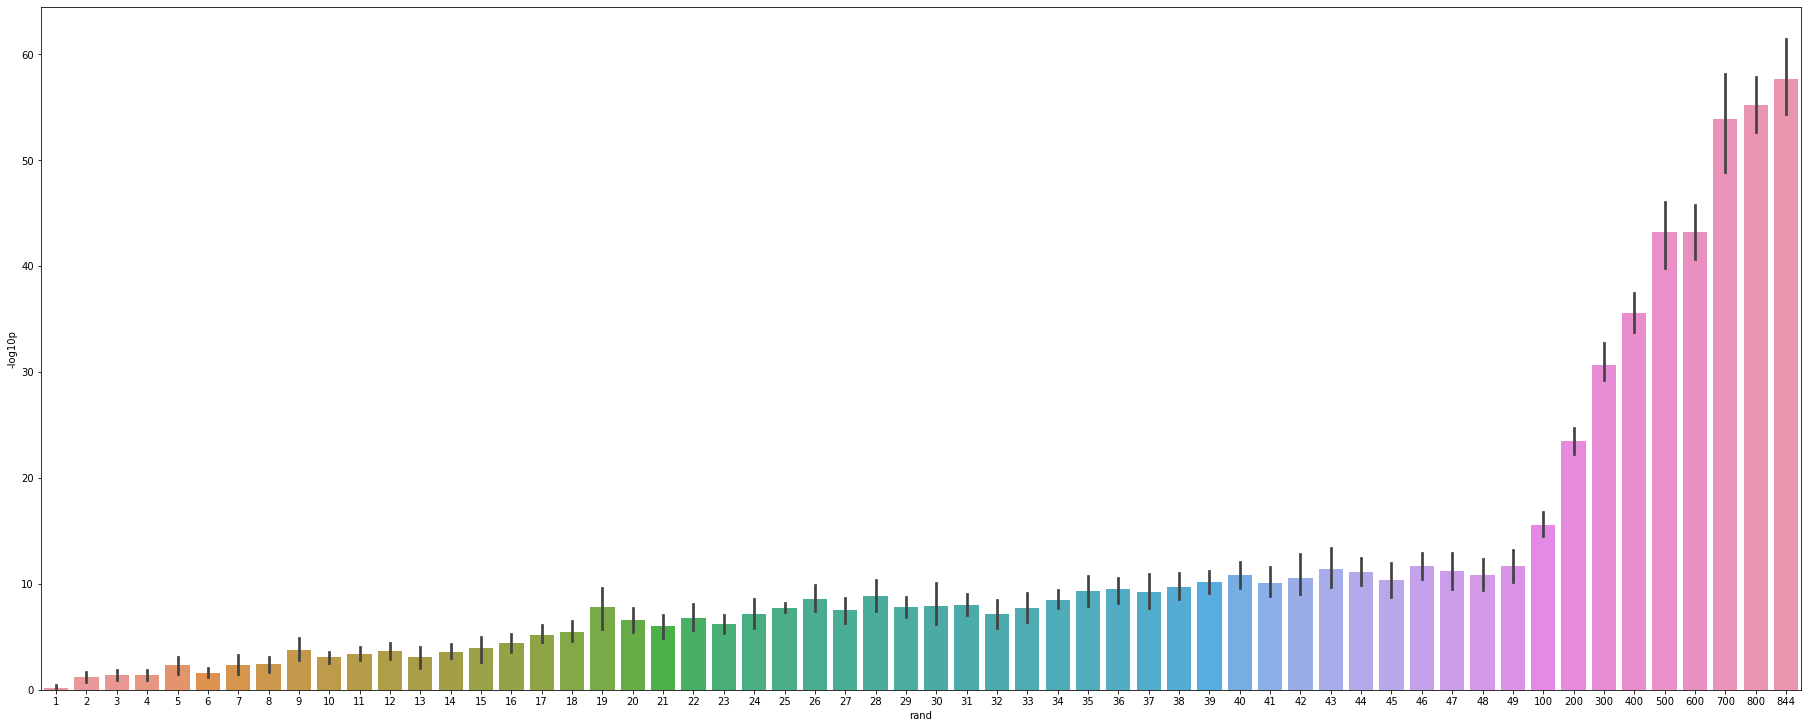

In [9]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="rand", y="-log10p", data=df, ax=ax)
fig.savefig(os.path.join(output_dir, 'recalculate_motifs.basedon-844-1.png'))
fig.savefig(os.path.join(output_dir, 'recalculate_motifs.basedon-844-1.svg'))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


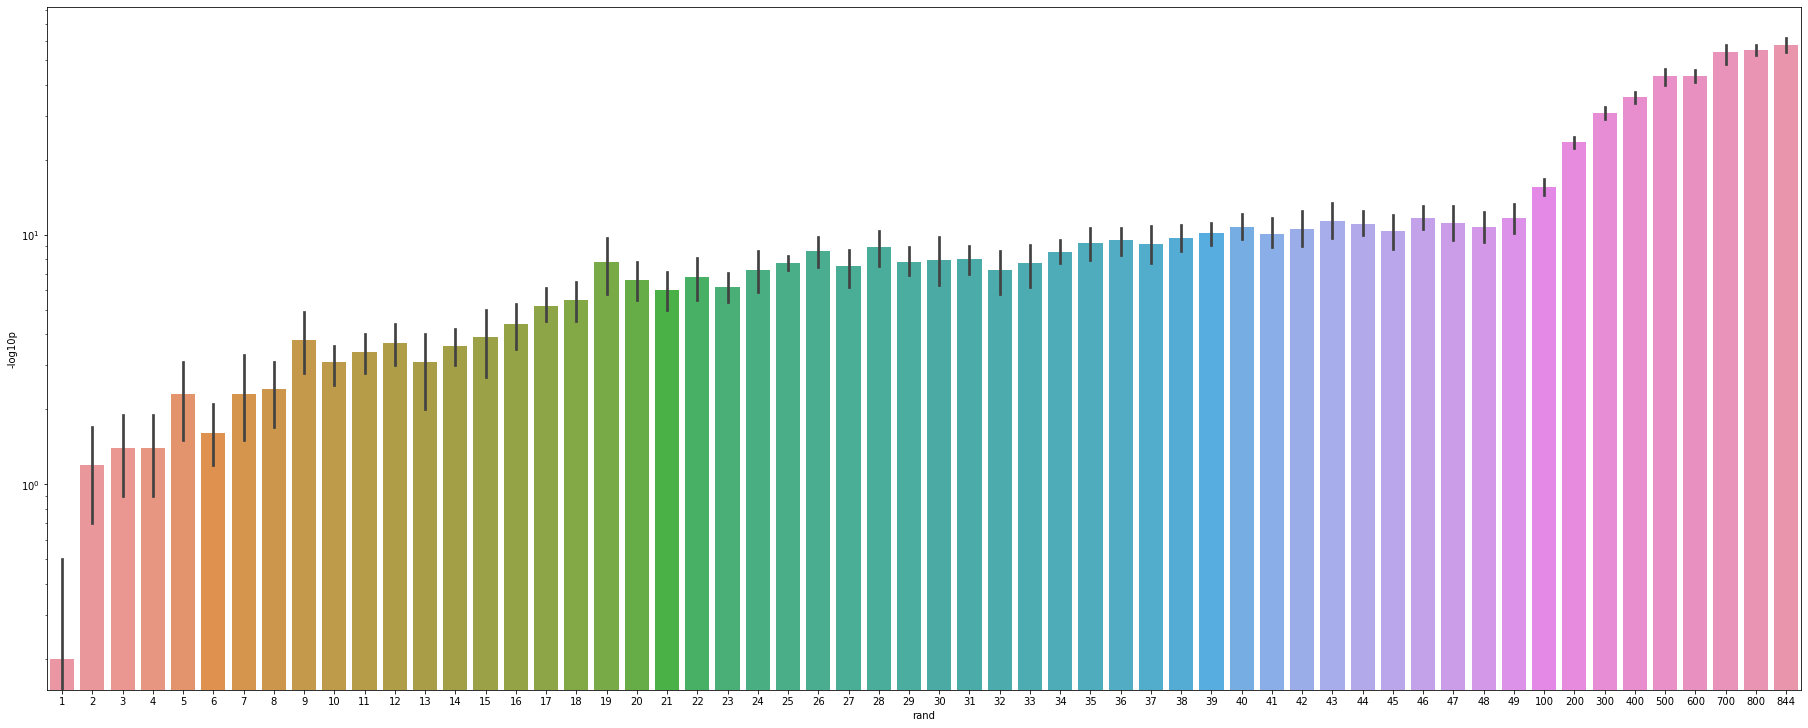

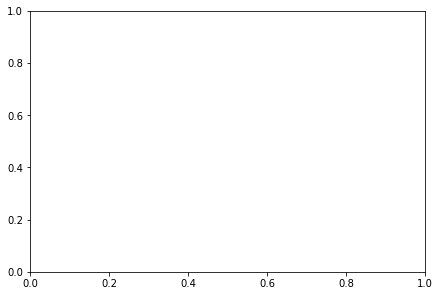

In [10]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x="rand", y="-log10p", data=df, ax=ax)
ax.set(yscale="log")
locs, labels = plt.xticks()
# ax.set_ylim(0, 75)
plt.subplots(constrained_layout=True)
# plt.rcParams['figure.constrained_layout.use'] = True
fig.savefig(os.path.join(output_dir, 'recalculate_motifs.basedon-844-1-semilog.png'))
fig.savefig(os.path.join(output_dir, 'recalculate_motifs.basedon-844-1-semilog.svg'))
fig.savefig(os.path.join(output_dir, 'recalculate_motifs.basedon-844-1-semilog.pdf'))